# Glider Data

**Useful links**
- [IOOS](https://gliders.ioos.us/)
- [IOOS map](https://gliders.ioos.us/map/)
- [ERDDAP OOI Demo](https://www.youtube.com/watch?v=tj4M9hodTG0)
- [reproducible-notebooks - ERDDAP_glider_search](https://github.com/reproducible-notebooks/ERDDAP_glider_search)

### Read glider data from ERDDAP

In [1]:
from erddapy import ERDDAP
import pandas as pd

def get_erddap_dataset(ds_id, server, variables=None, constraints=None, filetype=None):
    #  This function is taken directly from code written by Mike Smith, available at: 
    #      https://github.com/JGradone/Slocum-AD2CP/blob/main/src/analysis/analysis.py
    """
    Returns a netcdf dataset for a specified dataset ID (or dataframe if dataset cannot be converted to xarray)
    :param ds_id: dataset ID e.g. ng314-20200806T2040
    :param variables: optional list of variables
    :param constraints: optional list of constraints
    :param filetype: optional filetype to return, 'nc' (default) or 'dataframe'
    :return: netcdf dataset
    """
    variables = variables or None
    constraints = constraints or None
    filetype = filetype or 'nc'
    #ioos_url = 'https://data.ioos.us/gliders/erddap'


    e = ERDDAP(server,
               protocol='tabledap',
               response='nc')
    e.dataset_id = ds_id
    if constraints:
        e.constraints = constraints
    if variables:
        e.variables = variables
    if filetype == 'nc':
        try:
            ds = e.to_xarray()
            ds = ds.sortby(ds.time)
        except OSError:
            print('No dataset available for specified constraints: {}'.format(ds_id))
            ds = []
        except TypeError:
            print('Cannot convert to xarray, providing dataframe: {}'.format(ds_id))
            ds = e.to_pandas().dropna()
    elif filetype == 'dataframe':
        #ds = e.to_pandas().dropna()
        ds = e.to_pandas().dropna(how='all')
    else:
        print('Unrecognized filetype: {}. Needs to  be "nc" or "dataframe"'.format(filetype))

    return ds

**Load glider data - as netCDF**

In [2]:
## Load data
ds_id = 'ng296-20230726T172700'
variables = ['depth', 'latitude', 'longitude', 'time', 'temperature']
gdf = get_erddap_dataset(ds_id, server='https://gliders.ioos.us/erddap', variables = variables, filetype='nc')
gdf

<xarray.Dataset>
Dimensions:          (trajectory: 1, profile: 1344, obs: 1136257)
Coordinates:
  * trajectory       (trajectory) object 'NG296-20230726T0000'
    latitude         (profile) float64 ...
    longitude        (profile) float64 ...
    time             (profile) datetime64[ns] ...
    depth            (obs) float32 ...
Dimensions without coordinates: profile, obs
Data variables:
    profile_id       (profile) float64 ...
    trajectoryIndex  (profile) int32 ...
    rowSize          (profile) int32 ...
    temperature      (obs) float32 ...
Attributes: (12/51)
    cdm_data_type:                 TrajectoryProfile
    cdm_profile_variables:         time_uv,lat_uv,lon_uv,u,v,profile_id,time,...
    cdm_trajectory_variables:      trajectory,wmo_id
    Conventions:                   Unidata Dataset Discovery v1.0, COARDS, CF...
    creator_email:                 glider@ocean.navo.navy.mil
    creator_name:                  Glider Operations Center
    ...                            ...
    subsetVariables:               wmo_id,trajectory,profile_id,time,latitude...
    summary:                       Slocum Glider data collected by Naval Ocea...
    time_coverage_end:             2023-12-06T06:55:21Z
    time_coverage_start:           2023-07-26T18:08:01Z
    title:                         ng296-20230726T172700
    Westernmost_Easting:           -78.63120539710144

**Load glider data - as pd**

In [3]:
ds_id = 'ng296-20230726T172700'
gdf = get_erddap_dataset(ds_id, server='https://gliders.ioos.us/erddap', filetype='dataframe')

gdf

,trajectory,wmo_id,profile_id,time (UTC),latitude (degrees_north),longitude (degrees_east),depth (m),conductivity (S m-1),conductivity_qc,density (kg m-3),...,salinity_qc,temperature (degrees_C),temperature_qc,time_qc,time_uv (UTC),time_uv_qc,u (m s-1),u_qc,v (m s-1),v_qc
0,NG296-20230726T0000,4802924,725000001,2023-07-26T18:08:01Z,29.909832,-78.631205,0.306676,60.614300,1,1022.09430,...,1,30.8726,1,1,NaN,NaN,NaN,NaN,NaN,NaN
1,NG296-20230726T0000,4802924,725000001,2023-07-26T18:08:01Z,29.909832,-78.631205,0.405604,60.607903,1,1022.08570,...,1,30.8791,1,1,NaN,NaN,NaN,NaN,NaN,NaN
2,NG296-20230726T0000,4802924,725000001,2023-07-26T18:08:01Z,29.909832,-78.631205,0.217641,60.604900,4,1022.08870,...,4,30.8732,4,1,NaN,NaN,NaN,NaN,NaN,NaN
3,NG296-20230726T0000,4802924,725000001,2023-07-26T18:08:01Z,29.909832,-78.631205,0.108821,60.611900,4,1022.08496,...,4,30.8808,4,1,NaN,NaN,NaN,NaN,NaN,NaN
4,NG296-20230726T0000,4802924,725000001,2023-07-26T18:08:01Z,29.909832,-78.631205,0.375925,60.598000,4,1022.09390,...,4,30.8643,4,1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136252,NG296-20230726T0000,4802924,760007219,2023-12-06T06:55:21Z,29.366461,-77.773539,12.095306,54.647797,1,1024.53800,...,1,24.7213,1,1,2023-12-06T04:02:56Z,1.0,-0.09276,8.0,0.1477,8.0
1136253,NG296-20230726T0000,4802924,760007219,2023-12-06T06:55:21Z,29.366461,-77.773539,10.599530,54.649100,1,1024.53100,...,1,24.7230,1,1,2023-12-06T04:02:56Z,1.0,-0.09276,8.0,0.1477,8.0
1136254,NG296-20230726T0000,4802924,760007219,2023-12-06T06:55:21Z,29.366461,-77.773539,9.301860,54.652800,1,1024.52420,...,1,24.7270,1,1,2023-12-06T04:02:56Z,1.0,-0.09276,8.0,0.1477,8.0
1136255,NG296-20230726T0000,4802924,760007219,2023-12-06T06:55:21Z,29.366461,-77.773539,7.647566,54.658300,1,1024.51510,...,1,24.7328,1,1,2023-12-06T04:02:56Z,1.0,-0.09276,8.0,0.1477,8.0


### Read glider data taken from THREDDS

In [4]:
import os
import xarray as xr


current_directory = os.getcwd()
file_path = os.path.join(current_directory, 'assets', 'glider_data', 'UW646-20220907T0000.nc3.nc')

# Open the NetCDF file
dataset = xr.open_dataset(file_path)

# Explore the dataset
dataset


/Users/simedroniraluca/Documents/pineview/echopype-scratchpad/.venv/lib/python3.10/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(


<xarray.Dataset>
Dimensions:          (trajectory: 2, profile: 1196, obs: 1814)
Coordinates:
  * trajectory       (trajectory) object 'UW646-20210816T0000' 'UW646-2022090...
    time             (trajectory, profile) datetime64[ns] ...
    latitude         (trajectory, profile) float64 ...
    longitude        (trajectory, profile) float64 ...
    lat_uv           (trajectory, profile) float64 ...
    lon_uv           (trajectory, profile) float64 ...
    time_uv          (trajectory, profile) datetime64[ns] ...
    depth            (trajectory, profile, obs) float32 ...
Dimensions without coordinates: profile, obs
Data variables: (12/41)
    wmo_id           (trajectory) object ...
    profile_id       (trajectory, profile) float64 ...
    u                (trajectory, profile) float64 ...
    v                (trajectory, profile) float64 ...
    cdom             (trajectory, profile, obs) float64 ...
    cdom_qc          (trajectory, profile, obs) float32 ...
    ...               ...
    temperature      (trajectory, profile, obs) float32 ...
    temperature_qc   (trajectory, profile, obs) float32 ...
    time_qc          (trajectory, profile, obs) float32 ...
    time_uv_qc       (trajectory, profile, obs) float32 ...
    u_qc             (trajectory, profile, obs) float32 ...
    v_qc             (trajectory, profile, obs) float32 ...
Attributes: (12/61)
    acknowledgment:                Integrated Ocean Observing System (IOOS)NA...
    cdm_data_type:                 TrajectoryProfile
    cdm_profile_variables:         time_uv,lat_uv,lon_uv,u,v,profile_id,time,...
    cdm_trajectory_variables:      trajectory,wmo_id
    comment:                       Data has not been reviewed and is provided...
    contributor_name:              Jack Barth, R. Kipp Shearman
    ...                            ...
    subsetVariables:               wmo_id,trajectory,profile_id,time,latitude...
    summary:                       Seaglider UW646 Trinidad Heat IOOS Line, C...
    time_coverage_end:             2023-01-26T13:31:17Z
    time_coverage_start:           2022-07-29T04:21:11Z
    title:                         UW646-20220907T0000
    Westernmost_Easting:           -129.1019898008582

### Read glider data taken from ERDDAP as CSV

**First, we conduct some tests using the ERDDAP server directly for this dataset:** [HERE](https://gliders.ioos.us/erddap/tabledap/sg625-20230919T0000.html)

- Data with time constraints

In [5]:
variables = [
    'depth',
    'latitude',
    'longitude',
    'salinity',
    'temperature',
    'density',
    'conductivity',
    'time',
]

ds_id = 'sg625-20230919T0000'

server = 'https://gliders.ioos.us/erddap'

min_time = '2023-11-28T00:00:00Z'
max_time = '2023-12-05T14:34:20Z'
constraints = {
    'time>=': min_time,
    'time<=': max_time,
}


gdf = get_erddap_dataset(ds_id, server=server, variables=variables, constraints=constraints, filetype='dataframe')

gdf.columns = variables


gdf


,depth,latitude,longitude,salinity,temperature,density,conductivity,time
0,650.61646,19.803709,-96.098331,NaN,7.124659,NaN,NaN,2023-11-28T01:06:37Z
1,650.61810,19.803709,-96.098331,NaN,7.126544,NaN,NaN,2023-11-28T01:06:37Z
2,650.58690,19.803709,-96.098331,NaN,7.128230,NaN,NaN,2023-11-28T01:06:37Z
3,650.48474,19.803709,-96.098331,NaN,7.129726,NaN,NaN,2023-11-28T01:06:37Z
4,650.39703,19.803709,-96.098331,NaN,7.127759,NaN,NaN,2023-11-28T01:06:37Z
...,...,...,...,...,...,...,...,...
104612,1004.07980,19.565581,-95.808235,NaN,4.859849,NaN,NaN,2023-12-05T12:14:18Z
104613,1004.19280,19.565581,-95.808235,NaN,4.858306,NaN,NaN,2023-12-05T12:14:18Z
104614,1004.23450,19.565581,-95.808235,NaN,4.857119,NaN,NaN,2023-12-05T12:14:18Z
104615,1004.23740,19.565581,-95.808235,NaN,4.858225,NaN,NaN,2023-12-05T12:14:18Z


In [6]:
print(gdf.dtypes)

depth           float64
latitude        float64
longitude       float64
salinity        float64
temperature     float64
density         float64
conductivity    float64
time             object
dtype: object


When visualizing oceanographic data collected over time, such as from gliders or buoys, it is common to encounter duplicate timestamps in the dataset, as with our example DataFrame. These duplications can occur due to various reasons, like multiple sensors recording different parameters at the same time.
In the provided `plot_depth_profile` function, the handling of potential duplicates is approached systematically:

1. **DataFrame Copy**: The function begins by creating a copy of the input DataFrame. This ensures that any modifications done during the plotting process do not alter the original data.

2. **Datetime Conversion**: The `time` column is converted to datetime objects using `pd.to_datetime`. This standardizes the time information, ensuring that all time-related operations are performed accurately.

3. **Indexing by Time**: By setting the `time` column as the index of the DataFrame, we facilitate time-based indexing and plotting. This is important for time series analysis and visualization.

4. **Data Cleaning**: Before plotting, rows with NaN values in either the variable of interest or the 'depth' column are removed using `df_cleaned = df_copy.dropna(subset=[variable, 'depth'])`. This step ensures that only valid data points are included in the plot.

5. **Scatter Plot**: A scatter plot is created where each point represents a measurement. When there are multiple measurements for the same timestamp (i.e., duplicates), they are all plotted. This could mean that for any given time, there could be several depth readings, each associated with a value for the specified variable. The color of each point reflects the magnitude of the variable.

6. **Color Coding**: The variable of interest is represented by the color of the points in the scatter plot, with the color intensity corresponding to the variable's value. This provides a visual representation of changes in the variable with respect to both depth and time.

7. **Axis Formatting**: The y-axis is inverted (`ax.invert_yaxis()`) to align with the oceanographic convention of displaying depth, where deeper depths are shown lower on the plot. The x-axis is formatted to display the date and time clearly.

By implementing these steps, the function `plot_depth_profile` creates a clear and informative visualization of the measured variable over time and depth, even in the presence of duplicates. The resulting plots allow for the examination of temporal changes in oceanographic parameters across different depths.

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd


def plot_depth_profile(df, variable, color_label, colormap):
    # Work on a copy to not modify the original DataFrame
    df_copy = df.copy()
    
    # Convert the 'time' column to datetime and set as index
    df_copy['time'] = pd.to_datetime(df_copy['time'])
    df_copy.set_index('time', inplace=True)
    
    # Drop rows where the variable or 'depth' is NaN
    df_cleaned = df_copy.dropna(subset=[variable, 'depth'])
    
    # Creating the scatter plot
    fig, ax = plt.subplots(figsize=(17, 2))
    scatter = ax.scatter(df_cleaned.index, df_cleaned['depth'], s=15, c=df_cleaned[variable], cmap=colormap, marker='o', edgecolor='none')
    
    # Inverting the y-axis for depth
    ax.invert_yaxis()
    
    # Formatting the x-axis to show time
    xfmt = mdates.DateFormatter('%H:%Mh\n%d-%b')
    ax.xaxis.set_major_formatter(xfmt)
    
    # Adding colorbar and labels
    cbar = fig.colorbar(scatter, orientation='vertical', extend='both')
    cbar.ax.set_ylabel(color_label)
    ax.set_ylabel('Depth (m)')
    ax.set_xlabel('Time')
    
    plt.show()


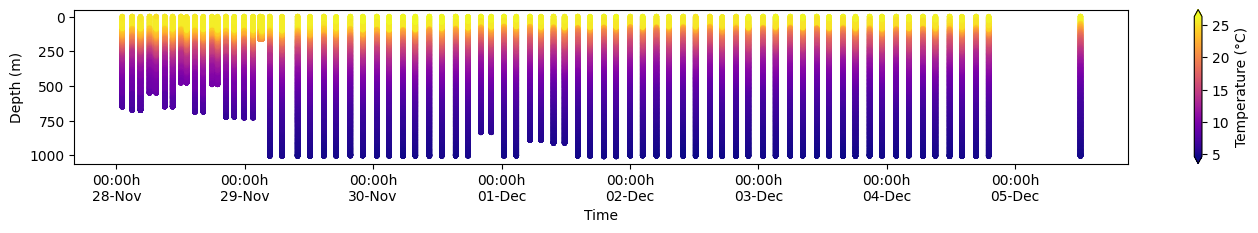

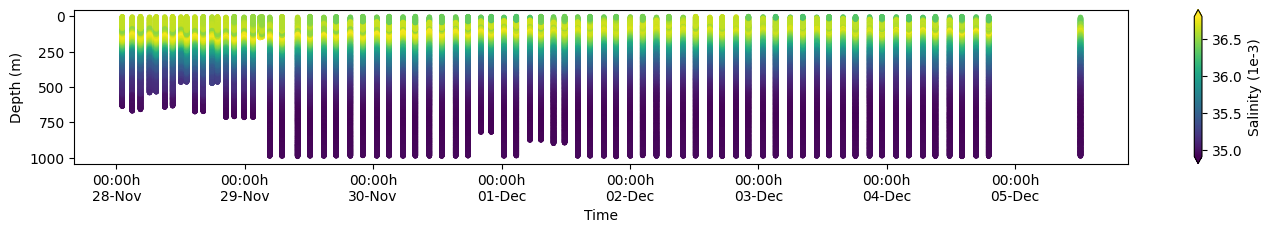

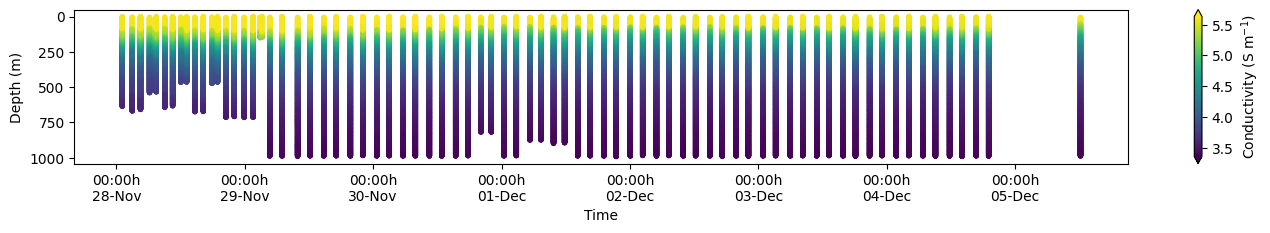

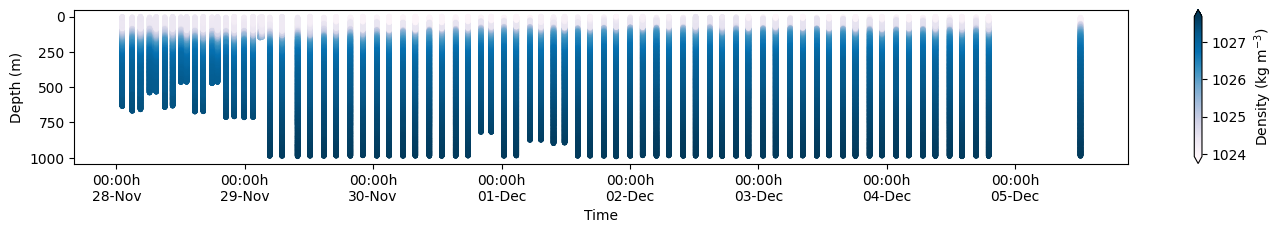

In [8]:
plot_depth_profile(gdf, 'temperature', 'Temperature (°C)', 'plasma')
plot_depth_profile(gdf, 'salinity', 'Salinity (1e-3)', 'viridis')
plot_depth_profile(gdf, 'conductivity', 'Conductivity (S m$^{-1}$)', 'viridis')
plot_depth_profile(gdf, 'density', 'Density (kg m$^{-3}$)', 'PuBu')

- Data without time constraints

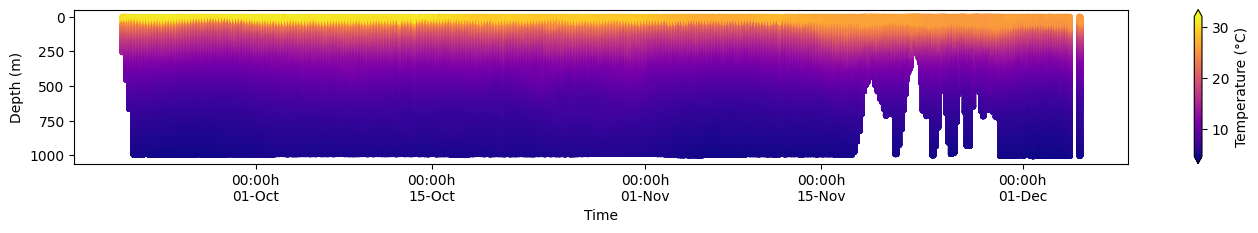

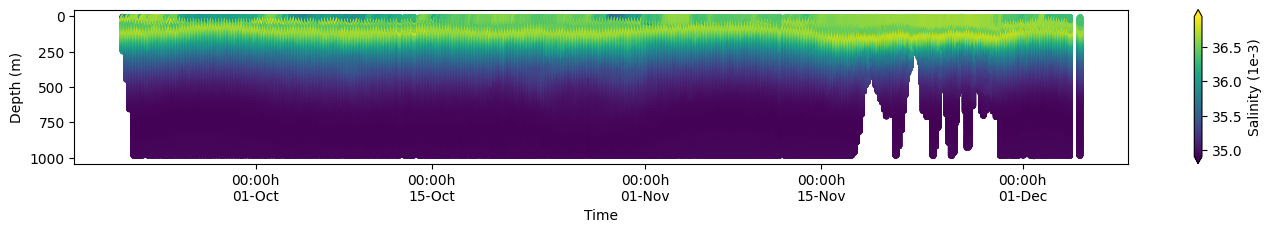

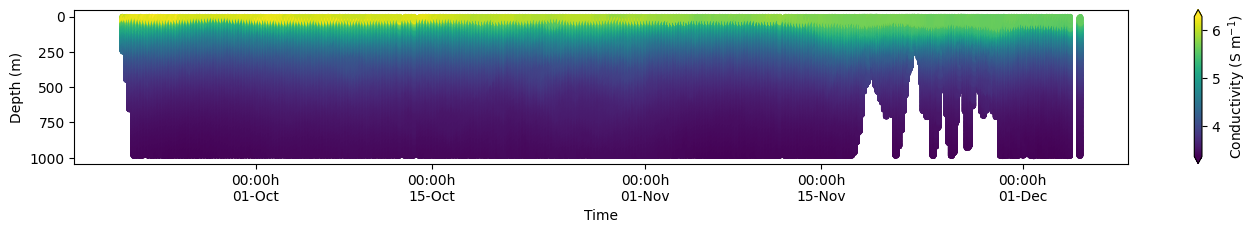

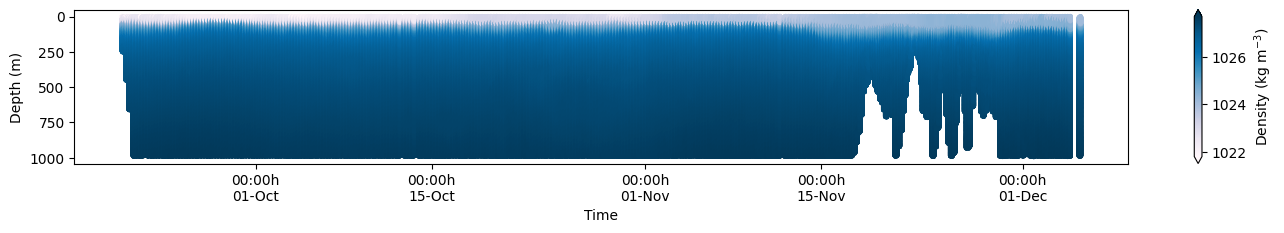

In [9]:
variables = [
    'depth',
    'latitude',
    'longitude',
    'salinity',
    'temperature',
    'density',
    'conductivity',
    'time',
]

ds_id = 'sg625-20230919T0000'

server = 'https://gliders.ioos.us/erddap'


gdf = get_erddap_dataset(ds_id, server=server, variables=variables, filetype='dataframe')

gdf.columns = variables


gdf

plot_depth_profile(gdf, 'temperature', 'Temperature (°C)', 'plasma')
plot_depth_profile(gdf, 'salinity', 'Salinity (1e-3)', 'viridis')
plot_depth_profile(gdf, 'conductivity', 'Conductivity (S m$^{-1}$)', 'viridis')
plot_depth_profile(gdf, 'density', 'Density (kg m$^{-3}$)', 'PuBu')

**After viewing some plots using data taken directly from the ERDDAP server, let's see if downloading the same data as a CSV file results in the same DataFrame**

In [10]:
variables = [
    'depth',
    'latitude',
    'longitude',
    'salinity',
    'temperature',
    'density',
    'conductivity',
    'time',
]

ds_id = 'sg625-20230919T0000'

server = 'https://gliders.ioos.us/erddap'

min_time = '2023-11-28T00:00:00Z'
max_time = '2023-12-05T14:34:20Z'
constraints = {
    'time>=': min_time,
    'time<=': max_time,
}


gdf = get_erddap_dataset(ds_id, server=server, variables=variables, constraints=constraints, filetype='dataframe')

gdf.columns = variables


gdf

,depth,latitude,longitude,salinity,temperature,density,conductivity,time
0,650.61646,19.803709,-96.098331,NaN,7.124659,NaN,NaN,2023-11-28T01:06:37Z
1,650.61810,19.803709,-96.098331,NaN,7.126544,NaN,NaN,2023-11-28T01:06:37Z
2,650.58690,19.803709,-96.098331,NaN,7.128230,NaN,NaN,2023-11-28T01:06:37Z
3,650.48474,19.803709,-96.098331,NaN,7.129726,NaN,NaN,2023-11-28T01:06:37Z
4,650.39703,19.803709,-96.098331,NaN,7.127759,NaN,NaN,2023-11-28T01:06:37Z
...,...,...,...,...,...,...,...,...
104612,1004.07980,19.565581,-95.808235,NaN,4.859849,NaN,NaN,2023-12-05T12:14:18Z
104613,1004.19280,19.565581,-95.808235,NaN,4.858306,NaN,NaN,2023-12-05T12:14:18Z
104614,1004.23450,19.565581,-95.808235,NaN,4.857119,NaN,NaN,2023-12-05T12:14:18Z
104615,1004.23740,19.565581,-95.808235,NaN,4.858225,NaN,NaN,2023-12-05T12:14:18Z


In [12]:
print(gdf.dtypes)

depth           float64
latitude        float64
longitude       float64
salinity        float64
temperature     float64
density         float64
conductivity    float64
time             object
dtype: object


In [13]:
csv_file_path = os.path.join(current_directory, 'assets', 'glider_data', 'sg625-20230919T0000_f192_3cce_1140.csv')
df = pd.read_csv(csv_file_path, header=0, skiprows=[1])
df

,time,latitude,longitude,depth,conductivity,density,salinity,temperature
0,2023-11-28T01:06:37Z,19.803709,-96.098331,650.61646,NaN,NaN,NaN,7.124659
1,2023-11-28T01:06:37Z,19.803709,-96.098331,650.61810,NaN,NaN,NaN,7.126544
2,2023-11-28T01:06:37Z,19.803709,-96.098331,650.58690,NaN,NaN,NaN,7.128230
3,2023-11-28T01:06:37Z,19.803709,-96.098331,650.48474,NaN,NaN,NaN,7.129726
4,2023-11-28T01:06:37Z,19.803709,-96.098331,650.39703,NaN,NaN,NaN,7.127759
...,...,...,...,...,...,...,...,...
104612,2023-12-05T12:14:18Z,19.565581,-95.808235,1004.07980,NaN,NaN,NaN,4.859849
104613,2023-12-05T12:14:18Z,19.565581,-95.808235,1004.19280,NaN,NaN,NaN,4.858306
104614,2023-12-05T12:14:18Z,19.565581,-95.808235,1004.23450,NaN,NaN,NaN,4.857119
104615,2023-12-05T12:14:18Z,19.565581,-95.808235,1004.23740,NaN,NaN,NaN,4.858225


In [14]:
print(df.dtypes)

time             object
latitude        float64
longitude       float64
depth           float64
conductivity    float64
density         float64
salinity        float64
temperature     float64
dtype: object


In [15]:
import pandas as pd

df2=df.copy()
df1=gdf.copy()

# Align the columns of df2 to match the order of df1
df2_aligned = df2[df1.columns]

# Compare the two DataFrames
are_equal = df1.equals(df2_aligned)

print("Are the DataFrames equal (ignoring column order)?", are_equal)


Are the DataFrames equal (ignoring column order)? True


**Finally, we conduct some tests using the data taken from the CSV file**

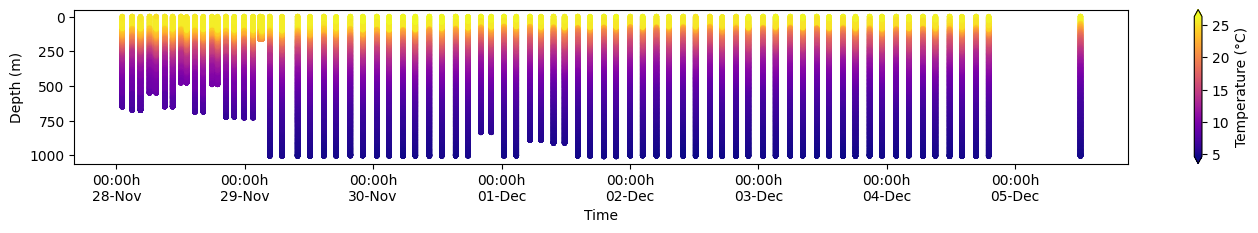

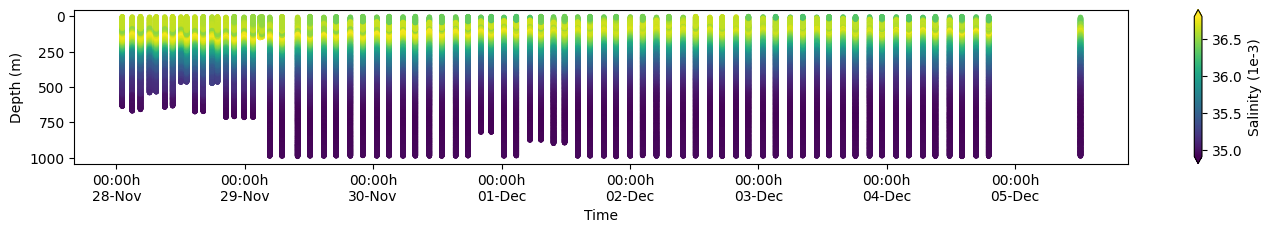

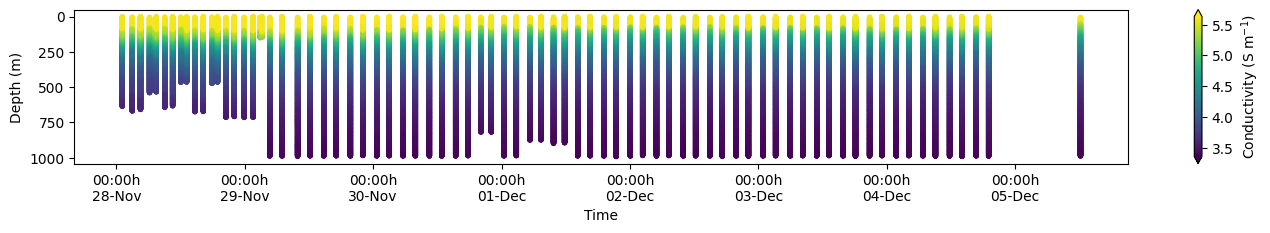

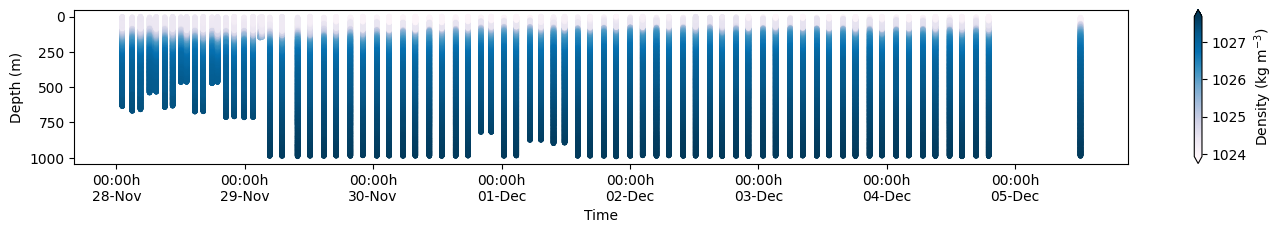

In [16]:
plot_depth_profile(df, 'temperature', 'Temperature (°C)', 'plasma')
plot_depth_profile(df, 'salinity', 'Salinity (1e-3)', 'viridis')
plot_depth_profile(df, 'conductivity', 'Conductivity (S m$^{-1}$)', 'viridis')
plot_depth_profile(df, 'density', 'Density (kg m$^{-3}$)', 'PuBu')